In [1]:
import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['/home/kelu/.local/lib/python3.6/site-packages/mpl_toolkits', '/usr/lib/python3/dist-packages/mpl_toolkits'])

In [2]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob


In [3]:
def GetContri(path):
    results = [y for x in os.walk(path) for y in glob(os.path.join(x[0], 'Readme.md'))]
    Name = []
    Pos = []
    lon = []
    lat = []
    for eachContri in results:
        with open(eachContri) as FileContent:
            for line in FileContent: 
                if line.startswith( 'pos: ' ):
                    Coordon = line.replace('pos: ',"").strip()
                    Pos.append(Coordon)
                    X = float(Coordon.split(",")[0])
                    Y = float(Coordon.split(",")[1])
                    lon.append(X)
                    lat.append(Y)
                if line.startswith( 'who: ' ):
                    Name.append(line.replace('who: ',"").strip())
    return Name,Pos,lon,lat

In [4]:
Contrib = GetContri("./")
NbContrib = np.shape(Contrib)[1]

In [5]:
NbContrib

58

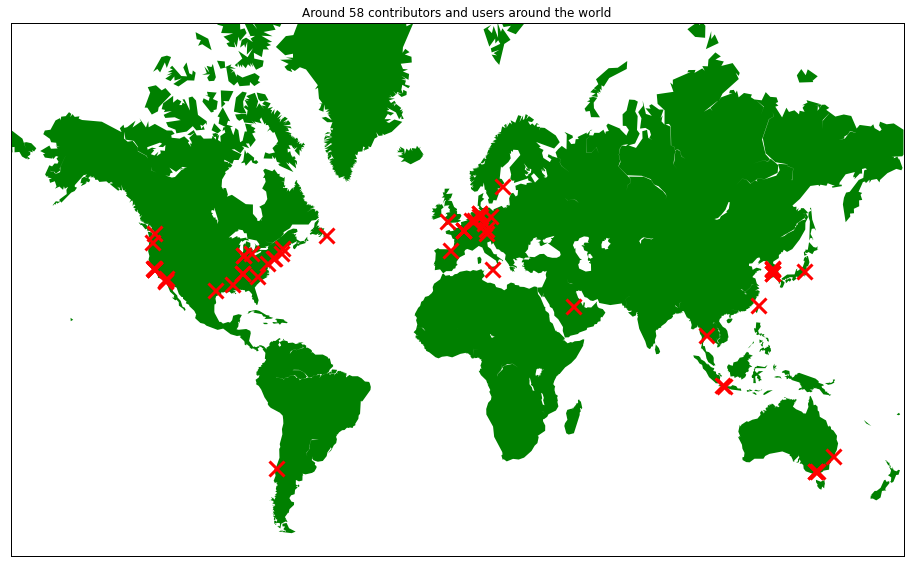

In [6]:
# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 10000000.0,
#              lat_0=0, lon_0=0)

eq_map = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=60,resolution='c')
#eq_map.drawcoastlines()
#eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
#eq_map.drawmeridians(np.arange(0, 360, 30))
#eq_map.drawparallels(np.arange(-90, 90, 30))
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, marker='x', color='r', markersize=15,mew=3)

title_string = "Around "+str(NbContrib)+" contributors and users around the world" 
plt.title(title_string)
plt.savefig("map.jpg", bbox_inches='tight')
plt.show()

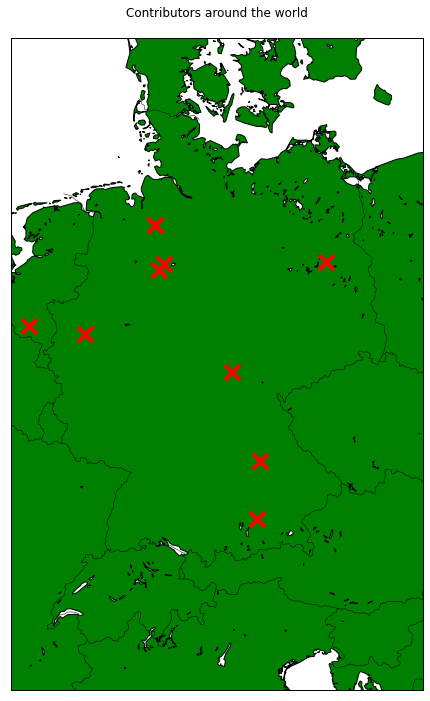

In [7]:
# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='merc', resolution = 'i',area_thresh = 1,
llcrnrlat=45.0,
llcrnrlon=5.0,
urcrnrlat=56.0,
urcrnrlon=16)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors around the world\n" 
plt.title(title_string)
plt.savefig("germany.jpg", bbox_inches='tight')
plt.show()

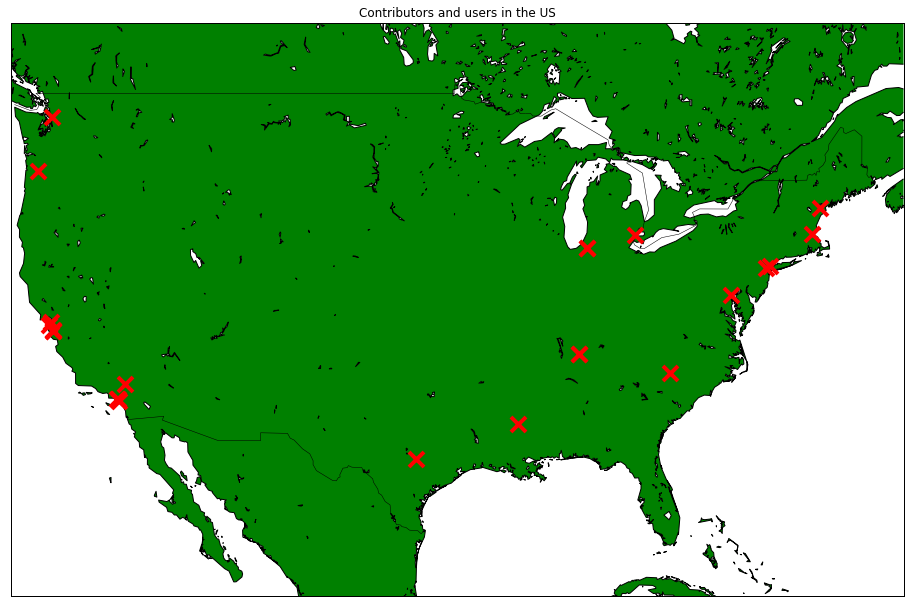

In [8]:
# Make this plot larger.
plt.figure(figsize=(16,12))
Lt = 37
Lo = -95
LtE = 15
LoE = 30
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in the US" 
plt.title(title_string)
plt.savefig("us.jpg", bbox_inches='tight')
plt.show()

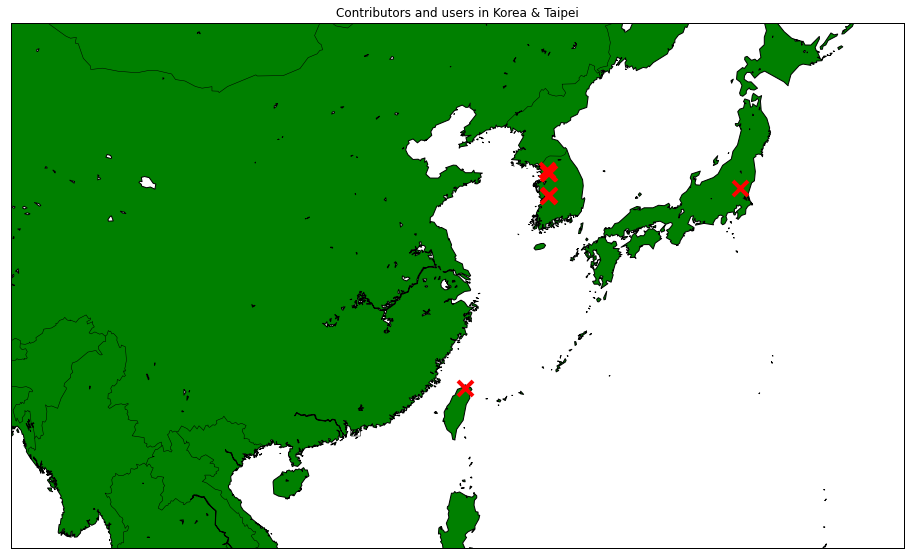

In [9]:
# Make this plot larger.
plt.figure(figsize=(16,12))
Lt = 30
Lo = 121
LtE = 15
LoE = 30
eq_map = Basemap(projection='merc', resolution = 'l',area_thresh = 10,
llcrnrlat=Lt-LtE,
llcrnrlon=Lo-LoE,
urcrnrlat=Lt+LtE,
urcrnrlon=Lo+LoE)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
 
for k in range(NbContrib):
    #print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'rx', markersize=15,mew=4)

title_string = "Contributors and users in Korea & Taipei" 
plt.title(title_string)
plt.savefig("asia.jpg", bbox_inches='tight')
plt.show()